In [1]:
import pandas as pd
import pyodbc
import urllib.request

import matplotlib.pyplot as plt 
import numpy as np
import json

pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

In [2]:
#set the required country

country = "BRAZIL"

In [3]:
#get the database

server = '###database = 'panorama' 
username = '### 
password = '###' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

data = pd.read_sql_query('SELECT * FROM [panorama].[dbo].[athletics]',cnxn)

data = data.replace(['nan'],float('NaN'))
data.head()

,Created On,Created By,Item ID,Athletics or Varsity Sports - NAME,Athletics ACRONYM,Athletics NICKNAME,Athletics Logo,Kind,Division,Athletics WEBSITE,Website status,About Athletics Scholarships,Sports,Country,State,City - STATE,Address,Latitude,Longitude,Phone,Mobile,Institutional Contact Number Status,Institutional Email,Email analysis,Course,EDUCATION INSTITUTION which is Affiliated to,HIERARCHICAL AFFILIATION,HIERARCHICAL - Vinculated,HIERARCHICAL - Recognized,Sponsors / Patrocinadores,Partners & Supporters / Parceiros & Apoiadores\t,Suppliers / Fornecedores,Media Partners / Parceiros de Mídia,Facebook,Instagram,Twitter,Youtube,Twitch,LinkedIn,Flickr,Vimeo,Recorded by,Record Date,NOTES
0,2020-10-31 17:17:02,Gustavo Melo,1561670809,Associação Atlética Acadêmica de Fisioterapia ...,AAAFFU,Atlética Dino,https://files.podio.com/1213140126,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,"R. Universitária - Universitário, Cascavel - P...",-24.9863421,-53.4439561,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Physiotherapy; Pharmacy (Or Biochemical),UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/atleticadino1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
1,2020-10-31 17:13:08,Gustavo Melo,1561670161,Associação Atlética Acadêmica do Centro de Hum...,AAACHUFB,Predadores,https://files.podio.com/1213139700,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Francisco Beltrão - PR,NaN,NaN,NaN,NaN,+55 46 99942-8007,Has institutional contact number / Possui n...,predadoresfb@gmail.com,Has institutional email domain / Possui do...,NaN,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/PredadoressUnioeste/,https://www.instagram.com/predadoresunioeste/,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
2,2020-10-31 17:09:32,Gustavo Melo,1561669520,Associação Atlética Acadêmica das Engenharias ...,AAAEUC,Venenosa,https://files.podio.com/1213139469,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,NaN,NaN,NaN,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Engineering,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/aaaeuc/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
3,2020-10-31 17:06:10,Gustavo Melo,1561668985,Associação Atlética Acadêmica de Biologia Unio...,AAABUC,Predadora,https://files.podio.com/1213139185,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Cascavel - PR,NaN,NaN,NaN,NaN,NaN,NO institutional contact number / NÃO possui...,NaN,NO institutional email domain address / NÃ...,Biology,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/PredadoraUnioeste/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo Melo,2020-10-31,NaN
4,2020-10-31 17:03:29,Gustavo Melo,1561668481,Associação Atlética Acadêmica de Nutrição da U...,AAANUFB,Atlética Devoradores,https://files.podio.com/1213138860,Athletics (from a university or college),Not Applicable,NaN,NO WEBSITE,No athletics scholarships,NaN,BRAZIL,PARANÁ,Francisco Beltrão - PR,NaN,NaN,NaN,NaN,+55 46 99137-9894,Has institutional contact number / Possui n...,atleticadevora206@gmail.com,Has institutional email domain / Possui do...,Nutrition,UNIVERSIDADE ESTADUAL DO OESTE DO PARANÁ,NaN,NaN,Federação Paranaense de Desportos Universitári...,NaN,NaN,NaN,NaN,https://www.facebook.com/aatleticadevora/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gustavo M

In [4]:
# Filter by Country #

paises = data['Country'].tolist()
index = []
for counter in range(len(paises)):
    if paises[counter] != country:
        index += [counter]
data = data.drop(index)

In [5]:
## Numero de Atleticas

athletics = data["Item ID"].tolist()
numero_atleticas = len(athletics)
print("Numero de Atleticas =", numero_atleticas)

Numero de Atleticas = 2836


In [6]:
## Distribuição por Estado (Dados)

estados = data["State"].tolist()
dic = {}

for estado in estados:
    if estado != estado.upper():
        pass
    elif dic.get(estado) == None:           #or if a[1] in dic:
        dic[estado] = 1
    elif dic.get(estado) != None:         #or if a[1] not in dic:
        dic[estado] += 1
print(dic)

{'PARANÁ': 74, 'BAHIA': 103, 'DISTRITO FEDERAL': 10, 'PERNAMBUCO': 51, 'MARANHÃO': 11, 'RIO GRANDE DO NORTE': 17, 'PIAUÍ': 34, 'ALAGOAS': 33, 'RIO GRANDE DO SUL': 83, 'SERGIPE': 29, 'GOIÁS': 32, 'PARAÍBA': 12, 'CEARÁ': 15, 'SANTA CATARINA': 143, 'MATO GROSSO DO SUL': 30, 'MATO GROSSO': 32, 'ESPÍRITO SANTO': 49, 'MINAS GERAIS': 571, 'TOCANTINS': 2, 'ACRE': 31, 'RONDÔNIA': 2, 'RIO DE JANEIRO': 407, 'SÃO PAULO': 1033, 'PARÁ': 4, 'RORAIMA': 3, 'AMAZONAS': 23, 'AMAPÁ': 1}


{'NORTE': 66, 'SUL': 300, 'SUDESTE': 2060, 'NORDESTE': 305, 'CENTRO-OESTE': 104}


<IPython.core.display.Javascript object>


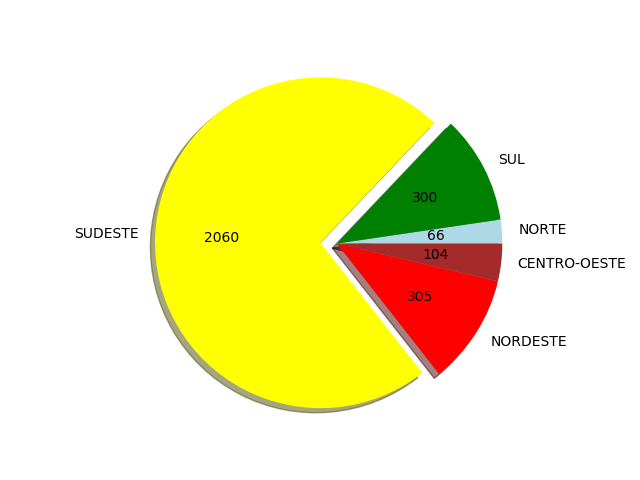

In [7]:
## Distribuição por Regiões (Brasil)
%matplotlib notebook

est_reg = {}

with open('regioes.json') as f:
    regioes = json.load(f)

for i in regioes["unidades-federativas"]:
    est_reg[i["unidade-federativa"].encode("latin-1").decode("utf-8").upper()] = i["regiao"].upper()

est_counter = {"NORTE": 0,"SUL": 0,"SUDESTE": 0,"NORDESTE": 0,"CENTRO-OESTE": 0}
for (x,y) in dic.items():
    try:
        est_counter[est_reg[x]] += y
    except:
        pass
print(est_counter)


labels = ["NORTE","SUL","SUDESTE","NORDESTE","CENTRO-OESTE"]
titulos = [i for i in est_counter.values()]
cores = ['lightblue', 'green', 'yellow', 'red',"brown"]
explode = (0, 0, 0.1, 0, 0)  # somente explode primeiro pedaco
total = sum(titulos)
plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=0)

plt.axis('equal') 
plt.show()

In [8]:
## Distribuição de Cursos

cursos = data["Course"].tolist()
dic2 = {}

for curso in cursos:
    if dic2.get(curso) == None:           #or if a[1] in dic:
        dic2[curso] = 1
    else:                                #or if a[1] not in dic:
        dic2[curso] += 1
'''
#respectivamente
lst_cursos = []
for (x,y) in dic2.items():
    elemento = [x,y]
    lst_cursos.append(tuple(elemento))
lst_cursos.sort(key=lambda tup: tup[1],reverse = True)
print(lst_cursos)
'''

print(dic2)

{'Physiotherapy; Pharmacy (Or Biochemical)': 1, nan: 1128, 'Engineering': 13, 'Biology': 28, 'Nutrition': 47, 'Medicine': 231, 'Law': 216, 'Engineering; Architecture': 2, 'Veterinary Medicine': 72, 'Social Communication': 17, 'General': 5, 'Mechanical Engineering': 4, 'Dentistry': 86, 'Environmental Engineering': 2, 'Architecture; Urbanism': 10, 'Physiotherapy': 67, 'Psychology': 59, 'Animal Science': 6, 'Computer Science': 23, 'Agribusiness Management': 2, 'Social Sciences': 3, 'Physical Education': 99, 'Civil Engineering': 27, 'Business Administration; Accounting': 10, 'Information Systems': 10, 'Architecture; Civil Engineering': 1, 'Accounting; Business Management': 1, 'Business Management; Accounting; Nursing; Hospitality; Portuguese Studies; Pedagogy; Tourism Management': 1, 'Biomedicine': 33, 'Mechatronics Engineering; Computer Engineering; Production Engineering': 1, 'Law; Economics; Accounting': 1, 'Agronomy (Or Agricultural Engineering)': 28, 'Pharmacy (Or Biochemical)': 39, '

In [9]:
## Dados sobre o site

webs = data["Website status"].tolist()
dic3 = {}

for web in webs:
    if dic3.get(web) == None:           #or if a[1] in dic:
        dic3[web] = 1
    else:                                #or if a[1] not in dic:
        dic3[web] += 1
        
#print(dic3)

porcent_noweb = dic3['NO WEBSITE']/numero_atleticas
porcent_good = dic3['Good']/numero_atleticas
porcent_excellent = dic3['Excellent']/numero_atleticas
porcent_average = dic3['Average']/numero_atleticas
porcent_below = dic3['Below Average / Abaixo da Média']/numero_atleticas
porcent_terrible = dic3['Terrible']/numero_atleticas

print("Porcentagem sem Website:",round(porcent_noweb*100,2),"%")
print("Porcentagem com Website 'excelente':",round(porcent_excellent*100,2),"%")
print("Porcentagem com Website 'bom':",round(porcent_good*100,2),"%")
print("Porcentagem com Website 'medio':",round(porcent_average*100,2),"%")
print("Porcentagem com Website 'abaixo da media':",round(porcent_below*100,2),"%")
print("Porcentagem com Website 'ruim':",round(porcent_terrible*100,2),"%")

Porcentagem sem Website: 95.17 %
Porcentagem com Website 'excelente': 0.74 %
Porcentagem com Website 'bom': 1.38 %
Porcentagem com Website 'medio': 1.59 %
Porcentagem com Website 'abaixo da media': 0.14 %
Porcentagem com Website 'ruim': 0.63 %


In [10]:
## Dados sobre o email

emails = data["Email analysis"].tolist()
dic4 = {}

for email in emails:
    if dic4.get(email) == None:           #or if a[1] in dic:
        dic4[email] = 1
    else:                                #or if a[1] not in dic:
        dic4[email] += 1
        
#print(dic4)
porcent_nohas = dic4['NO institutional email domain address   /   NÃO possui domínio institucional de email']/numero_atleticas
porcent_has = dic4['Has institutional email domain   /   Possui domínio institucional de email']/numero_atleticas
porcent_notev = dic4['You can not evaluate   /   Não é possível avaliar']/numero_atleticas

print("Porcentagem sem Email institucional:",round(porcent_nohas*100,2),"%")
print("Porcentagem com Email institucional:",round(porcent_has*100,2),"%")
print("Porcentagem não sendo possível avaliar:",round(porcent_notev*100,2),"%")

Porcentagem sem Email institucional: 93.51 %
Porcentagem com Email institucional: 6.24 %
Porcentagem não sendo possível avaliar: 0.14 %


In [37]:
## Dados sobre mídias sociais

midias = data["Facebook"].tolist() +  data["Instagram"].tolist() + data["Twitter"].tolist() + data["Youtube"].tolist()
midias += data["Twitch"].tolist() +  data["LinkedIn"].tolist() + data["Flickr"].tolist() + data["Vimeo"].tolist()

dic6 = {"yes":0,"no":0}
for midia in midias:
    if str(midia) == "nan":
        dic6["no"] += 1
    else:
        dic6["yes"] += 1
print(dic6)

print("Porcentagem sem nenhum tipo de mídia social:",round((dic6["no"]/len(midias))*100,2),"%")
print("Porcentagem com algum tipo de mídia social:",round((dic6["yes"]/len(midias))*100,2),"%")

{'yes': 3570, 'no': 19118}
Porcentagem sem nenhum tipo de mídia social: 84.26 %
Porcentagem com algum tipo de mídia social: 15.74 %


In [31]:
## Dados sobre Sponsors / Patrocinadores

patrocinios = data["Sponsors / Patrocinadores"].tolist()

dic5 = {"yes":0,"no":0}
for patrocinio in patrocinios:
    if str(patrocinio) == "nan":
        dic5["no"] += 1
    else:
        dic5["yes"] += 1
print(dic5)

print("Porcentagem sem patrocinadores:",round((dic5["no"]/len(patrocinios))*100,2),"%")
print("Porcentagem com patrocinadores:",round((dic5["yes"]/len(patrocinios))*100,2),"%")

{'yes': 10, 'no': 2826}
Porcentagem sem patrocinadores: 99.65 %
Porcentagem com patrocinadores: 0.35 %
